# Esercizio 1

**Hai a disposizione un file data.csv contenente dati mensili di passeggeri con due colonne:**

- **`date`: data in formato `YYYY-MM` (mese/anno)**
- **`passengers`: numero di passeggeri per quel mese**

**Costruisci un modello di regressione polinomiale che approssima l’andamento del numero di passeggeri nel tempo.**

1. **Carica il dataset.**
2. **Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.**
3. **Applica una regressione polinomiale (grado a tua scelta).**
4. **Calcola l’RMSE tra i valori reali e quelli predetti.**
5. **Visualizza i dati reali e la curva stimata con Plotly.**

## Punto 1.

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt

In [13]:
data_df = pd.read_csv("data.csv")
data_df["date"] = pd.to_datetime(data_df["date"], format = '%Y-%m').dt.to_period('M')
data_df.dropna(axis = 0, inplace = True)
data_df.reset_index(inplace = True)
data_df

,index,date,passengers
0,0,1949-01,112.0
1,1,1949-02,118.0
2,2,1949-03,132.0
3,3,1949-04,129.0
4,4,1949-05,121.0
...,...,...,...
126,126,1960-07,622.0
127,127,1960-08,606.0
128,128,1960-09,508.0
129,129,1960-10,461.0


## Punto 2.

In [14]:
data_df["mese_numerico"] = range(len(data_df))
data_df

,index,date,passengers,mese_numerico
0,0,1949-01,112.0,0
1,1,1949-02,118.0,1
2,2,1949-03,132.0,2
3,3,1949-04,129.0,3
4,4,1949-05,121.0,4
...,...,...,...,...
126,126,1960-07,622.0,126
127,127,1960-08,606.0,127
128,128,1960-09,508.0,128
129,129,1960-10,461.0,129


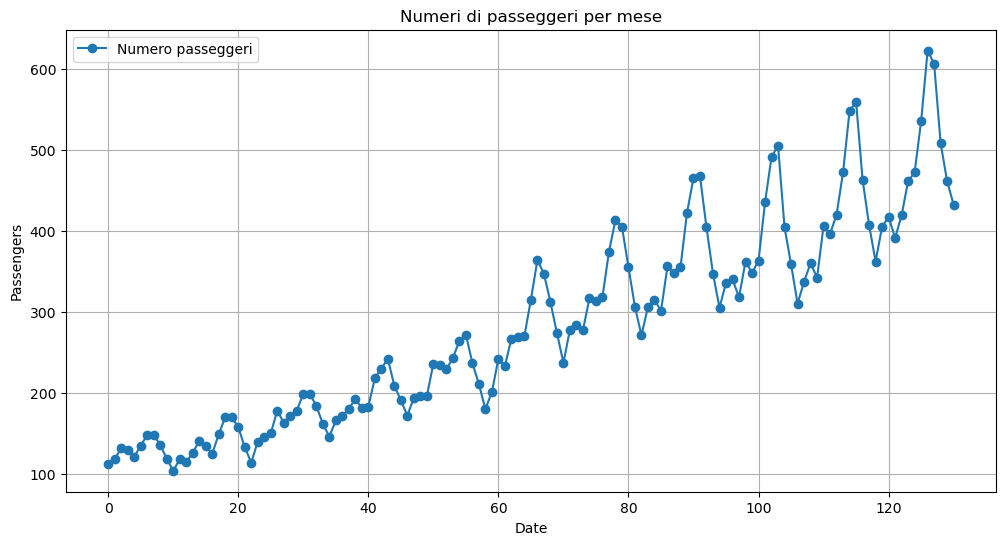

In [15]:
X = data_df["mese_numerico"].values.reshape(-1, 1)
y = data_df["passengers"].values

plt.figure(figsize = (12,6))
plt.plot(X, y, marker = 'o', linestyle = '-', label = 'Numero passeggeri')
plt.title('Numeri di passeggeri per mese')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

## Punto 3.

In [16]:
# Divisione train/test con test_size = 24
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 40, shuffle = False)

# Regressione lineare
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

# Regressione polinomiale di grado 2
model_poly3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
model_poly3.fit(X_train, y_train)
y_pred_poly3 = model_poly3.predict(X_test)

## Punto 4.

In [17]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_poly3 =  mean_absolute_error(y_test, y_pred_poly3)
rmse_linear = root_mean_squared_error(y_test, y_pred_linear)
rmse_poly3 =  root_mean_squared_error(y_test, y_pred_poly3)

## Punto 5.

In [19]:
# Costruiamo un DataFrame “largo” per Plotly
df_plot = pd.DataFrame({
    "mese_numerico": X_test.ravel(),        # ascissa
    "Reale": y_test,
    "Lineare": y_pred_linear,
    "Polinomiale grado 3": y_pred_poly3
})

# Passiamo da “wide” a “long” per avere una traccia per serie
df_long = df_plot.melt(id_vars="mese_numerico",
                       value_vars=["Reale", "Lineare", "Polinomiale grado 3"],
                       var_name="Serie",
                       value_name="Passeggeri")

fig = px.line(df_long,
              x="mese_numerico",
              y="Passeggeri",
              color="Serie",
              markers=True,          # puntini sui dati
              title="Confronto valori reali vs stime (lineare & polinomiale grado 3)")

fig.update_layout(xaxis_title="Mese numerico",
                  yaxis_title="Passengers",
                  template="plotly_white")

fig.add_annotation(
    xref="paper", yref="paper",
    x=0.02, y=0.98, showarrow=False, align="left",
    text=(
        f"MAE lineare = {mae_linear:.2f}<br>"
        f"MAE polinomiale = {mae_poly3:.2f}<br>"
        f"RMSE lineare = {rmse_linear:.2f}<br>"
        f"RMSE polinomiale = {rmse_poly3:.2f}"
    )
)

fig.show()
